In [1]:
# Warmup 1: what module allows us to work with random numbers?  Import it.


In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15


#### Warmup 2:  Grab this csv file
https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/s21/materials/lectureDemo_code/lec-39/Fire_Hydrants.csv
  

Make sure to download it as a .csv file

### Lecture 39:  Plotting Applications

**Learning Objectives**

39.1 Use data from a dataframe to generate random simulations

39.2 Apply features of line plots and bar plots to visualize results of data investigations

39.3 Clean Series data by dropping NaN values and by converting to int

39.4 Make a stacked bar plot

### Using Stock Market Data to Generate Random Simulations

In [3]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### Add a column to your dataframe

In [4]:
# add an extra column called "total" to the dataframe
# the value for the "total column will be :  df["return"].cumprod()
df['total'] = df["return"].cumprod()

df.tail()

,year,return,total
44,2014,1.1369,88.439335
45,2015,1.0138,89.659797
46,2016,1.1196,100.383109
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996


### Add another column to your dataframe, and set the indices of each row

In [5]:
starting = 1000
 
# add a new column called "wealth" to the dataframe which equals total column multiplied by starting
df["wealth"] = df["total"] * starting


# also, set the year column to be the index of each row (Series)
# just run this cell once, you will get an error the 2nd time

df.tail()

,year,return,total,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


### Make a line plot for the wealth column

Text(0, 0.5, 'Total wealth ($)')

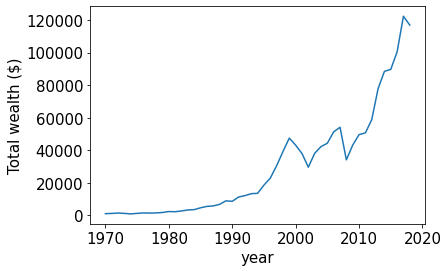

In [6]:
# make a line plot for just the wealth column
# store the result in the variable ax
ax = None
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Use Random.choices to randomly select a number of values from a list

In [7]:
import random
random.choice([3, 5, 9]) # selects one

3

In [8]:
random.choices([3, 5, 9], k = 10) # make a list of 10 random choices from this list, with replacement

[5, 3, 5, 9, 5, 3, 5, 5, 5, 3]

### Simulating stock market returns using past results
### Approach:
1. First, Run one simulation by randomly choosing previous returns, store the result in a Series
2. Then, Run many simulations, storing all the Series in a dataframe

In [9]:
# Step 1  Run one simulation by randomly choosing previous returns
def run_sim(years = 10, starting = 1000):
    # choose random choices from the 'return' column of our dataframe
    rand_returns = random.choices(df["return"], k = years)
    # print(rand_returns)
    #rand_returns = Series(rand_returns)
    rand_returns = Series(rand_returns).cumprod() * starting
    return rand_returns

run_sim(5)

0    1229.600000
1    1376.660160
2    1277.815961
3    1566.091241
4    1895.596838
dtype: float64

In [10]:


# Step 2 run many simulations and collect all the results into a dataframe
def run_n_sims(n, years = 10, starting = 1000):
    s = pd.DataFrame()
    for i in range(n):
        # this builds a dataframe one column (Series) at a time
        s["sim" + str(i)] = run_sim(years, starting) 
    return s

# small simulation to understand how it works
run_n_sims(3, 5)

,sim0,sim1,sim2
0,1218.300000,1285.800000,950.800000
1,949.055700,1654.567440,1158.359640
2,1124.061571,1573.162722,988.544117
3,1369.444212,1866.872202,622.782794
4,1455.308364,2360.846587,739.056341


In [11]:
# run 20 simulations, each lasting 30 years 
sims = run_n_sims(20, 30)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,sim11,sim12,sim13,sim14,sim15,sim16,sim17,sim18,sim19
25,15216.888319,7408.113918,11021.219571,15175.907612,20458.783085,9234.237662,7350.502761,14291.712234,9275.907046,22557.304929,20643.720938,8404.186014,46760.219607,14720.316586,5453.643456,1206.884415,5065.167909,6764.570131,4548.749178,6091.686805
26,14468.217414,9532.760989,12681.015239,18056.294877,22017.742356,11873.382786,7451.939699,17298.688488,10672.858647,29430.515742,25150.245219,11126.301864,51847.731501,12562.318175,7272.978913,760.337182,5864.957921,8317.715433,4798.475508,3837.762687
27,15926.613729,9063.749149,14060.709697,20640.150674,27073.016001,13845.551666,9133.097295,19774.130811,13123.346992,34077.594177,32338.185303,14652.226925,52532.121556,14572.289083,7827.179906,902.292133,5945.894341,7908.483834,5556.154790,4675.546282
28,10033.766649,9977.375063,18093.321238,22212.930155,35322.163977,15826.850110,10440.043518,20047.013816,12181.090678,45152.812285,30905.603694,16858.852299,33095.236581,13926.736676,9535.853279,1188.228511,6027.947682,10470.041747,5310.017133,3437.929181
29,12901.417158,11062.913470,23264.392448,23379.108988,37261.350779,14690.482272,14323.739707,23789.791295,14929.144735,47631.701679,32602.321337,17915.902339,33532.093703,12270.847686,6007.587566,1250.610507,7750.735130,14404.683436,3904.455598,3268.783065


<AxesSubplot:>

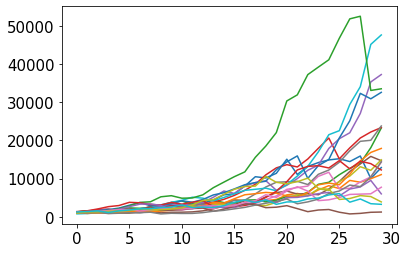

In [12]:
# line plot on a dataframe
# what happens when you set legend to True?
sims.plot.line(legend = False)

### Use the Quantile function to get a particular percentile
- defaults to 50th percentile
- defaults to calculating on all rows down each column and returning a Series

In [13]:
sims.quantile()


sim0     5895.862467
sim1     3746.271945
sim2     4150.112364
sim3     5094.367509
sim4     6442.586022
sim5     3038.995048
sim6     2891.113156
sim7     3804.780726
sim8     3018.368959
sim9     5580.620033
sim10    6809.199228
sim11    4254.393941
sim12    9796.396251
sim13    3780.336157
sim14    3335.070035
sim15    1829.328753
sim16    2874.014153
sim17    1891.392661
sim18    4529.342834
sim19    3192.749187
Name: 0.5, dtype: float64

In [14]:
# axis is the keyword argument that tells quantile how to make one calculation
# the default is axis='index'....this df matches the one above
sims.quantile(axis='index')

sim0     5895.862467
sim1     3746.271945
sim2     4150.112364
sim3     5094.367509
sim4     6442.586022
sim5     3038.995048
sim6     2891.113156
sim7     3804.780726
sim8     3018.368959
sim9     5580.620033
sim10    6809.199228
sim11    4254.393941
sim12    9796.396251
sim13    3780.336157
sim14    3335.070035
sim15    1829.328753
sim16    2874.014153
sim17    1891.392661
sim18    4529.342834
sim19    3192.749187
Name: 0.5, dtype: float64

### How can you change *quantile* to compute percentile across the columns?
- to change to iterating over each column of a single row, use axis = 'columns'
- axis works for many functions like mean, std, etc.,

In [15]:
run_n_sims(3, 5)
sims

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,sim11,sim12,sim13,sim14,sim15,sim16,sim17,sim18,sim19
0,1323.900000,1186.700000,1166.100000,1316.900000,1333.600000,1372.000000,1157.900000,1166.100000,969.000000,779.000000,1040.100000,1040.100000,1264.600000,1304.700000,1052.500000,1189.800000,1215.500000,1065.600000,969.000000,1264.600000
1,1265.251230,872.580510,1182.192180,1474.401240,1468.026880,1462.003200,1106.605030,1182.192180,1074.427200,872.168400,1387.077360,988.927080,1554.952160,1585.862850,1220.900000,1237.510980,1381.901950,1080.305280,1276.463700,1402.188480
2,1209.200601,1103.465313,1464.026796,1897.259516,1627.748205,1328.960909,975.029692,1247.094531,1133.413253,1032.996253,1585.568130,1028.583056,1370.068348,2069.075260,1416.244000,1254.588632,1400.143056,1162.624542,1303.397084,1543.529079
3,1374.740163,1341.262088,1540.888202,2021.719740,2001.479192,1035.260548,1160.090327,1533.427435,1288.577528,1329.259578,1881.593700,906.284531,1696.692642,2662.486045,1642.843040,1333.251339,1624.165945,854.877826,1445.206687,1134.956932
4,1628.242249,1788.707120,1908.235950,1574.919677,1260.931891,941.051838,1410.089793,966.059284,1135.365660,1751.033643,2292.345605,975.343412,2086.253273,2952.164527,1945.783297,1778.023985,1884.032496,941.049511,1540.012245,1557.160910
5,1708.188943,2033.581125,2338.733980,1505.150736,1545.398126,978.788017,1644.305708,1144.200616,1197.697234,1774.147287,3037.357926,1284.429739,2870.267253,3795.893149,2677.008659,2062.507823,1910.032144,1075.713696,1641.037049,1803.036618
6,1981.499174,1584.159697,2235.128065,1994.324725,2120.286229,1346.616554,1907.394621,1062.047012,1222.968646,2105.380585,3722.585875,1487.241195,3781.003052,3678.220461,3315.207524,1914.419761,1487.915040,1089.913117,2075.255452,2091.522477
7,2218.486475,1961.823368,2460.428974,2640.286503,2236.689943,1412.735426,1733.821710,1407.212291,1451.296892,2580.354445,2899.894396,1310.408217,3932.621275,3240.880048,3385.158403,2626.583912,1762.286574,1208.495664,1828.507579,2120.385487
8,2747.373651,2271.595278,2927.418393,2675.138285,2750.233953,1038.784359,1757.748450,1930.695263,1756.649758,3136.420828,3016.180162,1507.755694,5244.543732,3097.309062,2982.663069,1654.747865,2087.252218,761.352268,1852.643879,2410.666260
9,3024.308915,2301.580336,3767.001988,2842.869455,3370.686733,1195.225283,1873.056748,1956.180440,2021.201212,3796.323770,3429.095226,1714.167449,5532.469183,3764.779165,1879.077733,1745.593523,2196.832959,927.555468,2054.211533,2543.011838


In [16]:
sims.quantile(0.5, axis = 'columns')

0      1176.400000
1      1251.381105
2      1316.178996
3      1409.973425
4      1601.580963
5      1741.168115
6      1987.911949
7      2169.435981
8      2341.130769
9      2249.206648
10     2497.315137
11     2861.401593
12     3097.570601
13     3372.214739
14     3441.822198
15     4061.697288
16     4373.571684
17     4327.801857
18     5508.404618
19     6264.833273
20     6974.579371
21     7771.390448
22     7382.564223
23     8445.853478
24     8942.730165
25     9255.072354
26    11499.842325
27    13953.130682
28    13053.913677
29    14547.582854
Name: 0.5, dtype: float64

In [17]:
# run a sim with 250 simulations, each lasting 10 years
sims = run_n_sims(250, 10)

In [18]:
df = DataFrame({
    "10th percentile": sims.quantile(0.10, axis = 'columns'),
    "median": sims.quantile(0.5, axis = 'columns'),
    "90th percentile": sims.quantile(0.9, axis = 'columns')
})
df

,10th percentile,median,90th percentile
0,881.100000,1119.600000,1323.900000
1,852.948000,1236.803490,1523.141535
2,898.981695,1365.672277,1832.996245
3,947.781148,1520.238074,2096.035093
4,1024.230608,1652.569784,2384.322801
5,1107.038328,1831.654032,2725.017920
6,1099.881149,2059.890530,3260.532760
7,1205.137811,2237.337008,3790.120293
8,1281.042586,2509.469819,4535.419800
9,1392.651739,2829.573843,5104.403086


<AxesSubplot:>

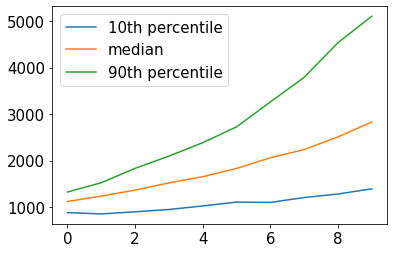

In [19]:
# .quantile
df.plot.line()

# Bar Plot Example w/ Fire Hydrants

In [20]:
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [21]:
# grab just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [22]:
# make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what type is this? 

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
Red          9
green        9
orange       4
ORANGE       1
C            1
white        1
GREEN        1
Name: nozzle_color, dtype: int64

In [23]:
# TODO:  clean the data ......use str.upper()

color_counts= hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'Fire hydrant count')

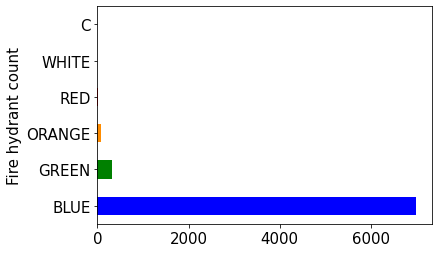

In [24]:
# make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color=["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

<AxesSubplot:>

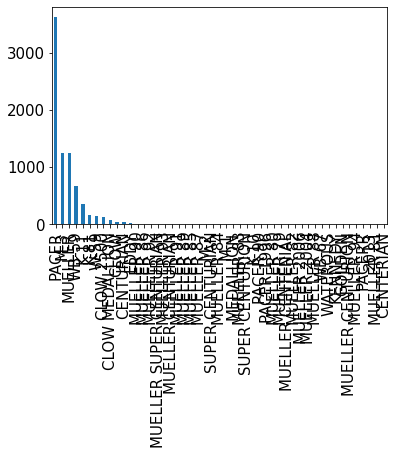

In [25]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

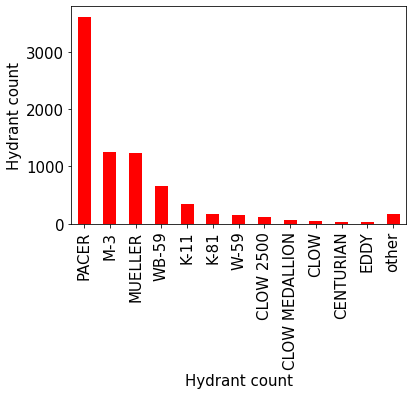

In [26]:
# let's just grab the top 12 
top12 = style_counts.iloc[:12]

# and them add an index to our Series for the sum of all the "other" for 
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### New Challenge:  Let's plot the year manufactured for the Pacer Style as opposed to other styles

In [27]:
# let's at the "year_manufactured" for just the Pacer "Style" and put that in a series

pacer_years = hdf [hdf["Style"] == "Pacer"]["year_manufactured"]

# note:  we can do this either way
#pacer_years = hdf["Style", "year_manufactured"][df["Style"] == "Pacer"]

pacer_years


0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [28]:
# then do the same for all the other data
other_years = hdf["year_manufactured"][hdf["Style"] != "Pacer"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

In [29]:
# let's do some arithmetic on this series to round each year down to the previous 10
# 1987 --> 1980,   2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [30]:
# now let's drop the NaN values, convert to int, and do value counts
pacer_decades = (pacer_years // 10 * 10).dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [31]:
# TODO:  do the same for other
other_decades = (other_years // 10 * 10).dropna()
other_decades = other_decades.astype(int).value_counts()
other_decades

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

In [32]:
# Build a DataFrame from a dictionary of key, Series
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


Text(0, 0.5, 'Hydrant Count')

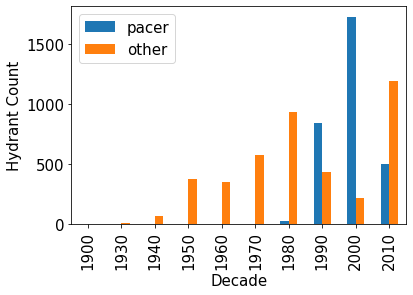

In [33]:
# make a bar plot

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

Text(0, 0.5, 'Hydrant Count')

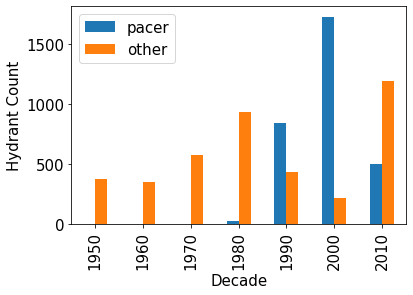

In [34]:
# change the x axis for data that we don't care about

ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

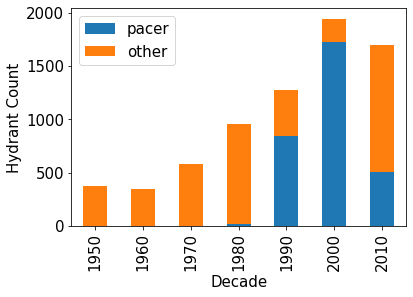

In [35]:
# make a Stacked Bar Chart!
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None